## Baseline-Model

To compare our results for the prediction we have to define a baseline-model. Although the data is not stationary at all we assume for the baseline model that the values for each year show no huge variation.  
For the baseline model we say that our predicted values are the values from one year before.

In [39]:
#import of the neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ftplib import FTP
import os
import warnings
from datetime import datetime
from dateutil.relativedelta import relativedelta

warnings.filterwarnings('ignore')

### Importing the dataset

and preproccess it like we do in the EDA

In [40]:
df_n = pd.read_csv('../data/N_seaice_extent_daily_v3.0.csv')

#drop first row because it's the description
df_n = df_n.iloc[1:,:]

#drop Source Data column
df_n.drop(' Source Data', axis=1, inplace=True)
df_n.head()

#renaming the columns
df_n.rename(columns={'Year':'year', ' Month':'month', ' Day':'day', '     Extent':'extent', '    Missing':'missing'}, inplace=True)

#change the date columns to pd.to_datetime
df_n['date'] = pd.to_datetime(df_n[['year', 'month', 'day']])

#change type of extent
df_n[['extent','missing']] = df_n[['extent','missing']].astype(float)
df_n[['extent','missing']] *=1000000

df_n.head()

,year,month,day,extent,missing,date
1,1978,10,26,10231000.0,0.0,1978-10-26
2,1978,10,28,10420000.0,0.0,1978-10-28
3,1978,10,30,10557000.0,0.0,1978-10-30
4,1978,11,01,10670000.0,0.0,1978-11-01
5,1978,11,03,10777000.0,0.0,1978-11-03


### Train/Test-Split

In [58]:
#for the forecast we only need the timestamp and the extend value
df_model = df_n[['date', 'extent']]
df_model.tail()

,date,extent
14182,2022-03-03,14703000.0
14183,2022-03-04,14748000.0
14184,2022-03-05,14762000.0
14185,2022-03-06,14756000.0
14186,2022-03-07,14769000.0


In [70]:
#create a y_pred column with values + 1year
y_pred = []
new_date = []
for i, day in enumerate(df['date']):
    y = df['extent'][i+1]
    nd = df['date'][i+1] + relativedelta(years=1)
    y_pred.append(y)
    new_date.append(nd)

df_newdate = pd.DataFrame({'date':new_date, 'y_pred':y_pred})

In [72]:
#we only need the last 5 years according to our test-set
df_pred = df_newdate.iloc[-2189:-365]
df_pred.head()

,date,y_pred
11997,2017-03-08,14397000.0
11998,2017-03-09,14390000.0
11999,2017-03-10,14354000.0
12000,2017-03-11,14408000.0
12001,2017-03-12,14379000.0


In [73]:
 # split into train and test sets (we use the last five years as test-data)

X = df_model['extent']
train_size = int(len(X)-(365*5-1))
train, test = X[1:train_size], X[train_size:]
#train_X, train_y = train[:,0], train[:,1]
#test_X, test_y = test[:,0], test[:,1]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 14186
Training Observations: 12361
Testing Observations: 1824


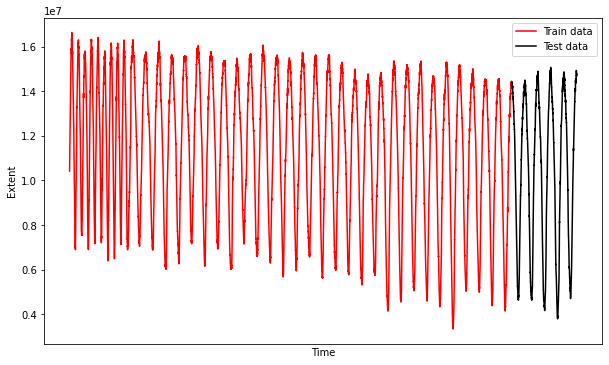

In [74]:
# Plotting the train and test set

plt.figure(figsize=(10,6))
plt.xlabel('Time')
plt.ylabel('Extent')
plt.xticks([])
plt.plot(train, 'red', label='Train data')
plt.plot(test, 'black', label='Test data')
plt.legend();

In [75]:
#dataframe for the test-split
df_test = df_model.iloc[-1824:]
df_test.head()

,date,extent
12363,2017-03-08,14326000.0
12364,2017-03-09,14331000.0
12365,2017-03-10,14310000.0
12366,2017-03-11,14394000.0
12367,2017-03-12,14369000.0


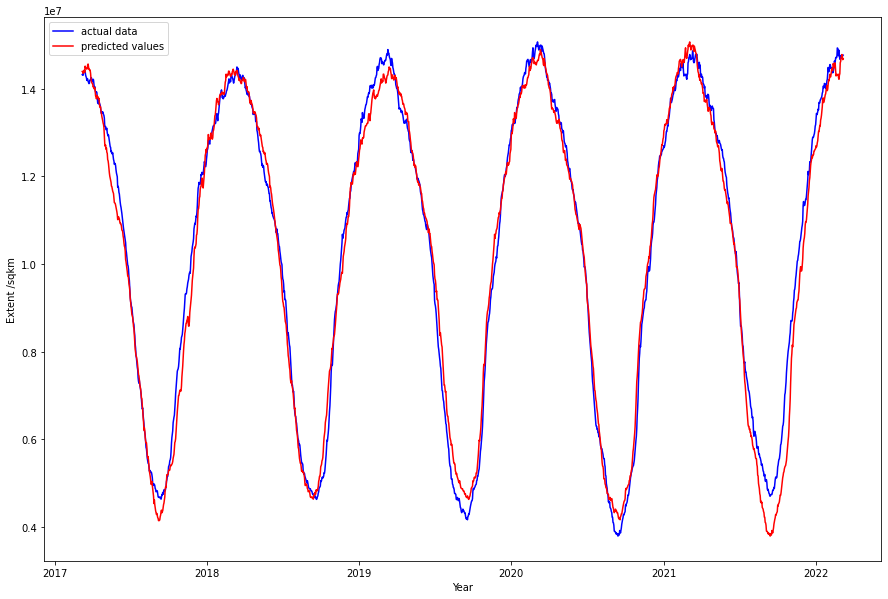

In [76]:
#plotting actual values and predicted values together
plt.figure(figsize=(15,10))
plt.xlabel('Year')
plt.ylabel('Extent /sqkm')
plt.plot(df_test['date'], df_test['extent'], 'b', label='actual data')
plt.plot(df_pred['date'], df_pred['y_pred'], 'r', label='predicted values')
plt.legend();